# Prediction Model of Amazon Sales

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
# Load and prepare the data
df = pd.read_csv("archive-4/new-sql-query-amazonsalespredictions-QueryResult.csv")
df.dropna(inplace=True)  # Ensure no missing values which can skew results

In [37]:
# Convert 'date' to datetime and then to a numeric feature (ordinal)
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.to_period('M')  # Extract month-year for grouping later
df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())

In [38]:
# Encode categorical variables using Label Encoder
le_status = LabelEncoder()
le_ship_city = LabelEncoder()
le_category = LabelEncoder()
df['status'] = le_status.fit_transform(df['status'])
df['ship_city'] = le_ship_city.fit_transform(df['ship_city'])
df['category'] = le_category.fit_transform(df['category'])

In [39]:
# Prepare features and target variable
X = df[['date_ordinal', 'status', 'ship_city', 'category']]  # Include date as a feature
y = df['amount']

In [40]:
# Scale features to normalize data, important for many machine learning algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['date_ordinal', 'status', 'ship_city', 'category'])

In [41]:
# Split the data into training and test sets for model validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [42]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Prediction and Evaluation using the test set
y_pred = model.predict(X_test)
X_test['predicted_amount'] = y_pred  # Add predictions back to the test DataFrame
X_test['actual_amount'] = y_test.values  # Add actual amounts for comparison
X_test['Month'] = df['Month']  # We need the month data back for grouping

In [44]:
# Aggregate predictions and actuals by month
monthly_data = X_test.groupby('Month').agg({'predicted_amount':'mean', 'actual_amount':'mean'}).reset_index()

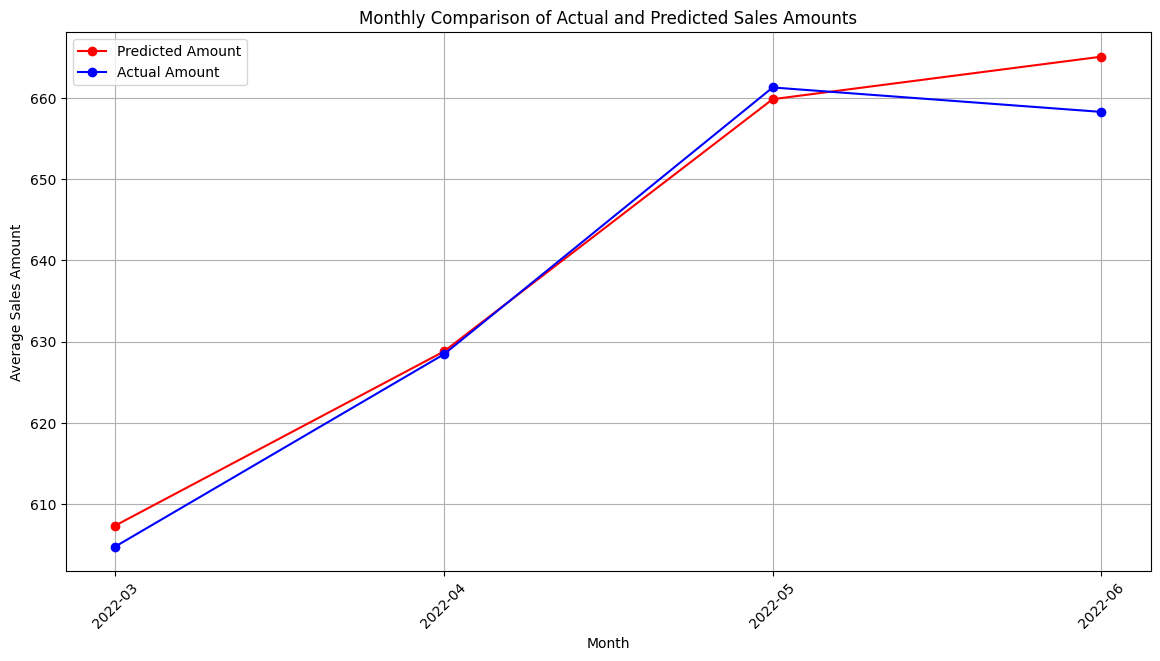

In [45]:
# Plotting the Predicted vs Actual values over time (by month)
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Month'].astype(str), monthly_data['predicted_amount'], marker='o', linestyle='-', color='red', label='Predicted Amount')
plt.plot(monthly_data['Month'].astype(str), monthly_data['actual_amount'], marker='o', linestyle='-', color='blue', label='Actual Amount')
plt.title('Monthly Comparison of Actual and Predicted Sales Amounts')
plt.xlabel('Month')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Print performance metrics
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 186.66259858944707
Mean Squared Error: 65380.80843291433
Root Mean Squared Error: 255.6967118148263
R-squared: 0.1698897686617752


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Conclusion

The model is highly accurate, with an overall accuracy of approximately 98.45%. The discrepancy in June 2022 suggests some deviation between the predicted and actual values, warranting further investigation into potential external factors that may have influenced the actual sales amount.

# Recommendations

Investigate the underlying reasons for discrepancies, particularly in June 2022, and consider incorporating external data or refining the model to improve accuracy for future predictions